In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df_index = pd.read_csv('Datasets\economic_data.csv')
df_index.head()

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ACER\AppData\Local\Temp\ipykernel_5352\2357229498.py:1: SyntaxWarning: invalid escape sequence '\e'
  df_index = pd.read_csv('Datasets\economic_data.csv')


,year,month,interest_rate,unemployment,index_price
0,2017,1,4.17,5.03,2054.25
1,2017,2,2.02,4.17,2327.98
2,2017,3,4.68,8.04,1645.46
3,2017,4,5.57,4.65,1813.10
4,2017,5,2.74,4.10,2238.30


In [4]:
## Drop unneccessary columns

df_index.drop(columns=['year','month'], axis=1, inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment,index_price
0,4.17,5.03,2054.25
1,2.02,4.17,2327.98
2,4.68,8.04,1645.46
3,5.57,4.65,1813.10
4,2.74,4.10,2238.30


In [6]:
df_index.isnull().sum()

interest_rate    0
unemployment     0
index_price      0
dtype: int64

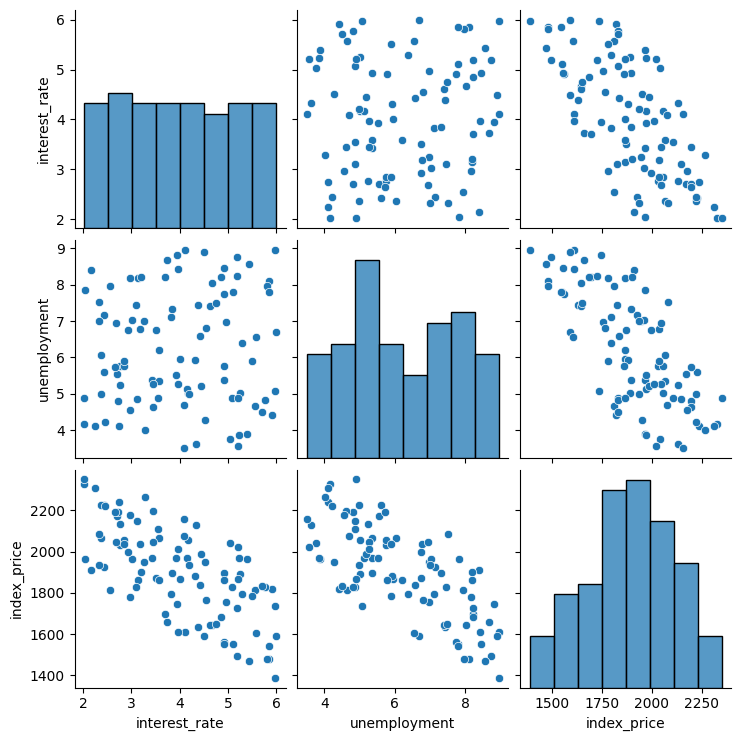

In [7]:
## lets do visualization
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment,index_price
interest_rate,1.000000,0.056404,-0.685796
unemployment,0.056404,1.000000,-0.725644
index_price,-0.685796,-0.725644,1.000000


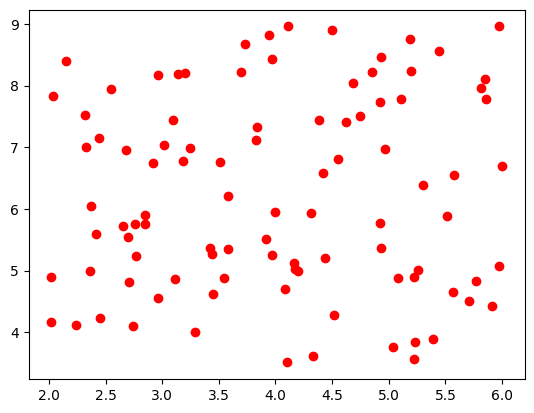

In [9]:
## Visualize the datapoins more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment'], color='r')

In [10]:
# independent and dependent features
X =df_index.iloc[::-1]
y =df_index.iloc[:,-1 ]

In [11]:
X.head()

,interest_rate,unemployment,index_price
95,3.29,4.01,2265.03
94,3.92,5.52,1969.40
93,4.75,7.50,1649.86
92,5.22,3.57,2021.01
91,2.77,5.23,2132.53


In [12]:
y.head()

0    2054.25
1    2327.98
2    1645.46
3    1813.10
4    2238.30
Name: index_price, dtype: float64

In [13]:
## train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

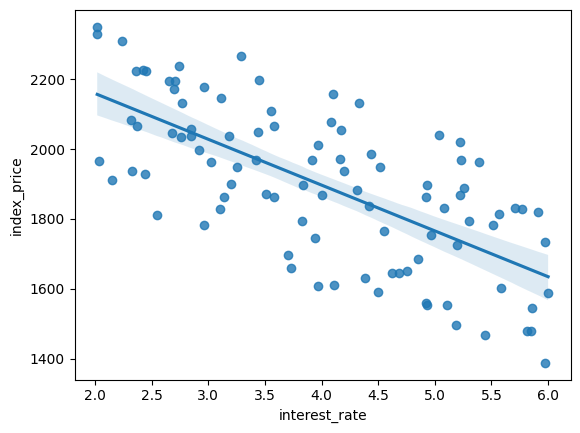

In [14]:
sns.regplot(x = df_index['interest_rate'],y =df_index['index_price'])
plt.show()

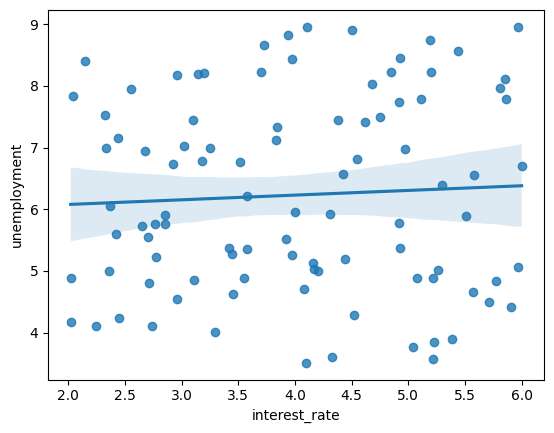

In [15]:
sns.regplot(x = df_index['interest_rate'],y =df_index['unemployment'])
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [18]:
X_train

array([[-1.23917955, -0.46849967,  1.3139496 ],
       [ 1.43035318, -1.12561609, -0.22278246],
       [-1.57619697,  0.77063415,  0.91280026],
       [ 0.83613825, -1.58872671,  0.71817789],
       [-1.46090154, -1.29458889,  1.53783746],
       [-1.46977042,  0.53282059,  0.20866953],
       [-0.13943849,  1.57794861, -0.61504843],
       [ 0.01133246,  1.66556414, -1.21469815],
       [-0.75139118,  0.43268856,  0.30079499],
       [-0.88442437,  0.72056814, -0.23824943],
       [ 1.55451749,  1.13361275, -1.81258924],
       [-0.58288247, -0.64373072,  0.75375645],
       [ 1.14654903, -1.50736944,  0.37271869],
       [-1.37221274,  1.03348072, -0.31057897],
       [ 0.7297117 ,  0.90205744, -1.44476379],
       [ 1.51904197,  1.03973897, -1.81033458],
       [-1.10614636, -0.24946086,  0.70189924],
       [-1.20370403, -1.37594616,  1.61070812],
       [-1.10614636, -0.33707639,  0.78992122],
       [ 0.7297117 , -0.33081813, -0.08245234],
       [-0.52080031,  0.28874878, -0.040

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
from sklearn.model_selection import cross_val_score

validation_score =cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [23]:
validation_score

array([-49505.63074028, -66028.09319545, -64147.24637602])

In [25]:
# Mean validation score
np.mean(validation_score)

np.float64(-59893.65677058213)

In [27]:
## Prediction
y_pred = regression.predict(X_test)

y_pred

array([1887.36365091, 1929.61526217, 1867.41302461, 1927.72613617,
       1882.75087342, 1916.91021325, 1915.23348535, 1926.11853787,
       1958.63545987, 1869.94082028, 1813.37885945, 1829.93017559,
       1808.10436127, 1902.11440527, 1916.70383973, 1931.67589361,
       1926.09808067, 1883.09804274, 1881.94919643, 1806.91397966,
       1930.76420671, 1859.17581321, 1858.54834687, 1849.15066821])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

39023.64385317819
161.52515512092404
197.54403016334913


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



-0.08649333614202415
-0.24946733656332776


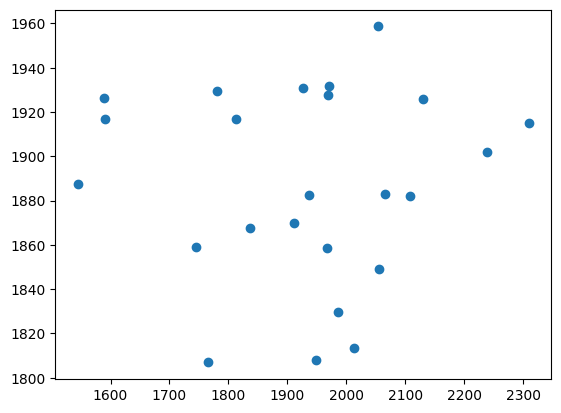

In [31]:
## Assumtion
plt.scatter(y_test,y_pred)


In [32]:
residuls = y_test-y_pred
print(residuls)

80   -343.193651
77   -148.165262
73    -30.163025
94     41.673864
33     53.279127
79   -104.680213
69    394.166515
42   -337.308538
0      95.614540
10     41.289180
64    199.271141
30    156.209824
18    140.815639
4     336.185595
31   -325.293840
26     39.534106
12    204.421919
22    183.411957
53    225.530804
85    -41.893980
40     -3.384207
67   -114.465813
15    109.521653
68    207.129332
Name: index_price, dtype: float64


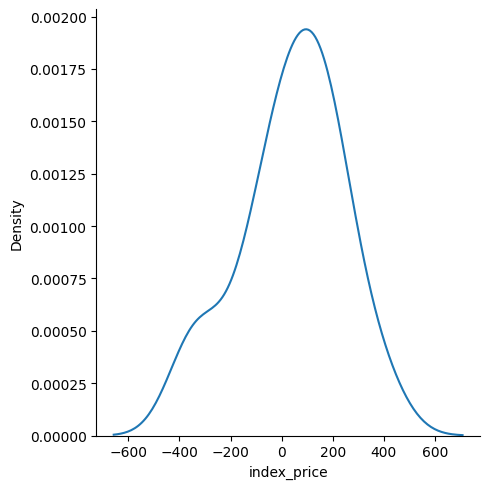

In [33]:
## Plot this residuls
sns.displot(residuls,kind='kde')

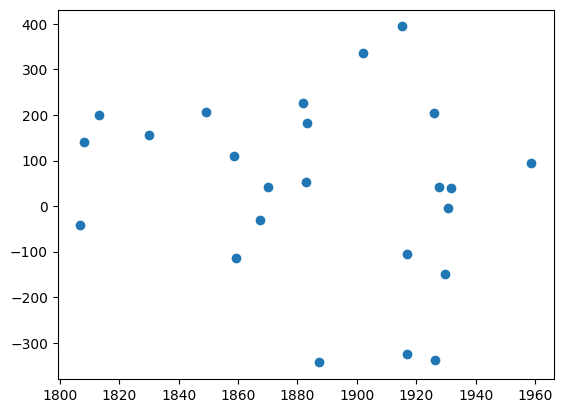

In [34]:
## scatter plot respect to prdiction and residuls
plt.scatter(y_pred,residuls)

In [37]:
## OLS Linear Regression

import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.043
Method:                 Least Squares   F-statistic:                            0.01412
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                       0.998
Time:                        21:41:24   Log-Likelihood:                         -645.74
No. Observations:                  72   AIC:                                      1297.
Df Residuals:                      69   BIC:                                      1304.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            40.9654    633.157      0.065      0.949   -1222.149    1304.080
x2           -11.6277    693.738     -0.017      0.987   -1395.598    1372.342
x3            46.3890    922.660      0.050      0.960   -1794.268    1887.046
==============================================================================
Omnibus:                        3.176   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.757
Skew:                          -0.023   Prob(JB):                        0.415
Kurtosis:                       2.236   Cond. No.                         7.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(regression.coef_)

[ 40.96541635 -11.62767123  46.38901384]
